In [ ]:
pd.DataFrame() #shift tab tab parantez içinde yaparsan fonksiyonun içine girer

In [69]:
#!pip install prophet
#!pip install holidays==0.25

In [70]:
#!pip install prophet==1.1.3

In [3]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cmdstanpy
from matplotlib import pyplot
#cmdstanpy.install_cmdstan()
#cmdstanpy.install_cmdstan(compiler=True)

In [4]:
data = pd.read_csv("station_rio.csv")
data.head(10)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1973,27.73,27.97,25.70,26.49,22.42,22.76,22.14,21.03,21.46,22.46,23.06,25.85,27.45,24.87,21.98,22.33,24.16
1,1974,26.68,27.16,26.56,23.94,22.76,20.70,21.20,21.81,22.91,22.80,24.51,24.54,26.56,24.42,21.24,23.41,23.91
2,1975,25.27,26.92,26.43,22.82,21.37,20.50,19.68,22.98,22.40,22.65,24.11,26.53,25.58,23.54,21.05,23.05,23.31
3,1976,27.48,26.20,25.55,24.99,22.01,21.18,20.14,21.15,21.27,22.06,24.40,25.56,26.74,24.18,20.82,22.58,23.58
4,1977,27.13,28.51,26.88,24.22,22.35,22.13,23.07,22.29,22.44,23.92,24.48,24.84,27.07,24.48,22.50,23.61,24.42
5,1978,27.44,26.55,26.42,23.39,21.85,20.03,21.94,21.28,22.49,23.51,25.00,25.66,26.28,23.89,21.08,23.67,23.73
6,1979,23.86,25.69,24.80,23.36,23.05,20.30,20.29,22.42,22.05,24.25,24.07,26.02,25.07,23.74,21.00,23.46,23.32
7,1980,25.39,27.24,27.83,24.63,23.41,21.20,21.81,22.22,21.05,23.10,24.20,27.01,26.22,25.29,21.74,22.78,24.01
8,1981,27.42,28.06,26.26,23.85,22.87,20.94,19.90,21.50,23.19,22.49,25.25,25.73,27.50,24.33,20.78,23.64,24.06
9,1982,24.55,27.51,25.00,22.73,21.58,22.44,21.30,22.34,22.41,23.50,26.15,24.98,25.93,23.10,22.03,24.02,23.77


In [5]:
data = data.drop(columns=['D-J-F', 'M-A-M', 'J-J-A', 'S-O-N', 'metANN'], axis=1)

In [6]:
data

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1973,27.73,27.97,25.70,26.49,22.42,22.76,22.14,21.03,21.46,22.46,23.06,25.85
1,1974,26.68,27.16,26.56,23.94,22.76,20.70,21.20,21.81,22.91,22.80,24.51,24.54
2,1975,25.27,26.92,26.43,22.82,21.37,20.50,19.68,22.98,22.40,22.65,24.11,26.53
3,1976,27.48,26.20,25.55,24.99,22.01,21.18,20.14,21.15,21.27,22.06,24.40,25.56
4,1977,27.13,28.51,26.88,24.22,22.35,22.13,23.07,22.29,22.44,23.92,24.48,24.84
5,1978,27.44,26.55,26.42,23.39,21.85,20.03,21.94,21.28,22.49,23.51,25.00,25.66
6,1979,23.86,25.69,24.80,23.36,23.05,20.30,20.29,22.42,22.05,24.25,24.07,26.02
7,1980,25.39,27.24,27.83,24.63,23.41,21.20,21.81,22.22,21.05,23.10,24.20,27.01
8,1981,27.42,28.06,26.26,23.85,22.87,20.94,19.90,21.50,23.19,22.49,25.25,25.73
9,1982,24.55,27.51,25.00,22.73,21.58,22.44,21.30,22.34,22.41,23.50,26.15,24.98


In [7]:
data.replace(999.90, np.nan, inplace = True)
null_counts = data.isnull().sum()

# If you want to get the total number of null values in the entire DataFrame, you can use:
total_null_values = data.isnull().sum().sum()

# Print the null counts for each column
print(null_counts)

# Print the total number of null values in the DataFrame
print("Total null values in the DataFrame:", total_null_values)

YEAR    0
JAN     4
FEB     6
MAR     3
APR     3
MAY     4
JUN     3
JUL     4
AUG     4
SEP     4
OCT     3
NOV     4
DEC     5
dtype: int64
Total null values in the DataFrame: 47


In [8]:
# ---- Data Transformations ----
months_dict = {'JAN':1,'FEB':2,'MAR':3,'APR':4,'MAY':5,'JUN':6,
               'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12}

data = data[['YEAR'] + list(months_dict.keys())]

# ---melting---
data = pd.melt(data, 
        id_vars='YEAR',
        value_vars=months_dict.keys(),
        var_name='MONTH', 
        value_name='Sum of Value').replace({"MONTH": months_dict}) # replaces month names to month numbers.

# ---For datetime index---
data["DAY"] = 1
data['DATE'] = pd.to_datetime(data[['YEAR','MONTH','DAY']])
data = data.rename(columns = {'Sum of Value':'TEMP'})
data = data.sort_values("DATE").reset_index(drop=True)
#dropping unwanted columns
data = data.drop(["YEAR", "MONTH", "DAY"], axis = 1)
data = data.set_index('DATE', drop = False)
data1 = data.set_index('DATE', drop = True)


In [9]:
data, data1

(             TEMP       DATE
 DATE                        
 1973-01-01  27.73 1973-01-01
 1973-02-01  27.97 1973-02-01
 1973-03-01  25.70 1973-03-01
 1973-04-01  26.49 1973-04-01
 1973-05-01  22.42 1973-05-01
 ...           ...        ...
 2019-08-01  22.30 2019-08-01
 2019-09-01  23.05 2019-09-01
 2019-10-01  25.25 2019-10-01
 2019-11-01    NaN 2019-11-01
 2019-12-01    NaN 2019-12-01
 
 [564 rows x 2 columns],
              TEMP
 DATE             
 1973-01-01  27.73
 1973-02-01  27.97
 1973-03-01  25.70
 1973-04-01  26.49
 1973-05-01  22.42
 ...           ...
 2019-08-01  22.30
 2019-09-01  23.05
 2019-10-01  25.25
 2019-11-01    NaN
 2019-12-01    NaN
 
 [564 rows x 1 columns])

In [10]:
data.info(), data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 564 entries, 1973-01-01 to 2019-12-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   TEMP    517 non-null    float64       
 1   DATE    564 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.2 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 564 entries, 1973-01-01 to 2019-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEMP    517 non-null    float64
dtypes: float64(1)
memory usage: 8.8 KB


(None, None)

In [11]:
data.replace(999.90, np.nan, inplace = True)
data_interpolated = data.interpolate()
data_interpolated

data1.replace(999.90, np.nan, inplace = True)
data_interpolated1 = data1.interpolate()
data_interpolated1

,TEMP
DATE,
1973-01-01,27.73
1973-02-01,27.97
1973-03-01,25.70
1973-04-01,26.49
1973-05-01,22.42
...,...
2019-08-01,22.30
2019-09-01,23.05
2019-10-01,25.25


In [12]:
null_counts = data_interpolated.isnull().sum()

# If you want to get the total number of null values in the entire DataFrame, you can use:
total_null_values = data_interpolated.isnull().sum().sum()

# Print the null counts for each column
print(null_counts)

# Print the total number of null values in the DataFrame
print("Total null values in the DataFrame:", total_null_values)


null_counts = data_interpolated1.isnull().sum()

# If you want to get the total number of null values in the entire DataFrame, you can use:
total_null_values = data_interpolated1.isnull().sum().sum()

# Print the null counts for each column
print(null_counts)

# Print the total number of null values in the DataFrame
print("Total null values in the DataFrame:", total_null_values)

TEMP    0
DATE    0
dtype: int64
Total null values in the DataFrame: 0
TEMP    0
dtype: int64
Total null values in the DataFrame: 0


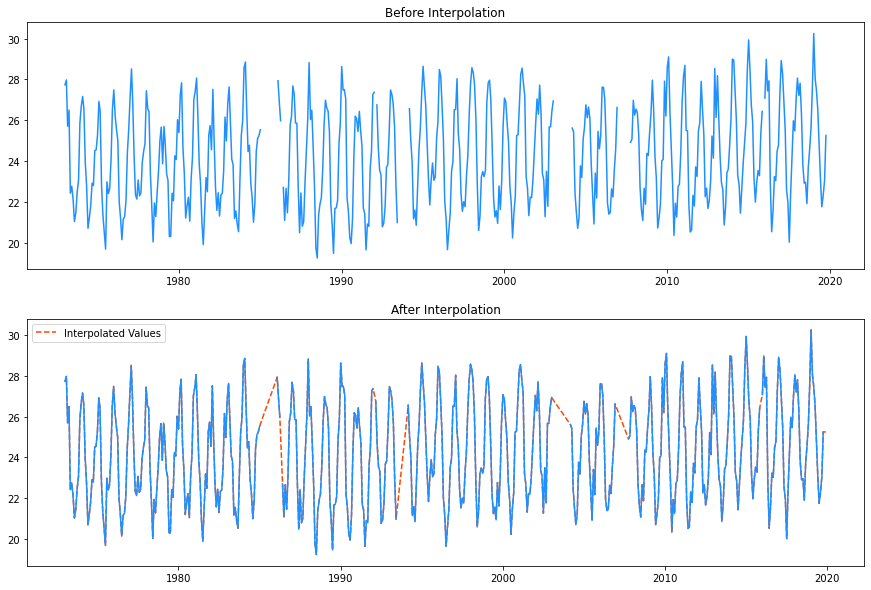

In [13]:
rows = 2
cols = 1

fig, axs = plt.subplots(2, figsize = (15, 10))


axs[0]
axs[0].set_title('Before Interpolation')
axs[0].plot(data1, color = 'dodgerblue')


axs[1].plot(data_interpolated1, color = 'orangered', linestyle = '--', label = 'Interpolated Values')
legend = plt.legend(loc = 'upper left')
axs[1].set_title("After Interpolation")
axs[1].plot(data1, color = 'dodgerblue')

plt.show()

In [14]:
data_interpolated.columns

Index(['TEMP', 'DATE'], dtype='object')

In [15]:
data_interpolated["ds"] = pd.to_datetime(data_interpolated["DATE"])
data_interpolated["y"] = data_interpolated["TEMP"]


In [16]:
data_interpolated.head(10)

,TEMP,DATE,ds,y
DATE,,,,
1973-01-01,27.73,1973-01-01,1973-01-01,27.73
1973-02-01,27.97,1973-02-01,1973-02-01,27.97
1973-03-01,25.70,1973-03-01,1973-03-01,25.70
1973-04-01,26.49,1973-04-01,1973-04-01,26.49
1973-05-01,22.42,1973-05-01,1973-05-01,22.42
1973-06-01,22.76,1973-06-01,1973-06-01,22.76
1973-07-01,22.14,1973-07-01,1973-07-01,22.14
1973-08-01,21.03,1973-08-01,1973-08-01,21.03
1973-09-01,21.46,1973-09-01,1973-09-01,21.46


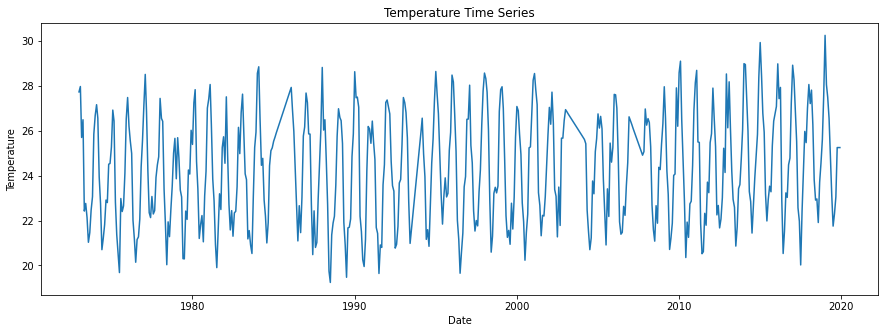

In [17]:
plt.figure(figsize=(15, 5))
plt.plot(data_interpolated["ds"], data_interpolated["y"] )
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Time Series")
plt.show()


In [18]:
data_interpolated

,TEMP,DATE,ds,y
DATE,,,,
1973-01-01,27.73,1973-01-01,1973-01-01,27.73
1973-02-01,27.97,1973-02-01,1973-02-01,27.97
1973-03-01,25.70,1973-03-01,1973-03-01,25.70
1973-04-01,26.49,1973-04-01,1973-04-01,26.49
1973-05-01,22.42,1973-05-01,1973-05-01,22.42
...,...,...,...,...
2019-08-01,22.30,2019-08-01,2019-08-01,22.30
2019-09-01,23.05,2019-09-01,2019-09-01,23.05
2019-10-01,25.25,2019-10-01,2019-10-01,25.25


In [19]:
model = Prophet()
model.fit(data_interpolated[["ds", "y"]])


14:13:54 - cmdstanpy - INFO - Chain [1] start processing
14:13:55 - cmdstanpy - INFO - Chain [1] done processing
14:13:55 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
14:13:55 - cmdstanpy - INFO - Chain [1] start processing
14:13:56 - cmdstanpy - INFO - Chain [1] done processing
14:13:56 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


RuntimeError: Error during optimization! Command 'C:\Users\muham\anaconda3\Lib\site-packages\prophet\stan_model\prophet_model.bin random seed=66839 data file=C:\Users\muham\AppData\Local\Temp\tmpj021mx84\2bmx0tvx.json init=C:\Users\muham\AppData\Local\Temp\tmpj021mx84\fx6sy85s.json output file=C:\Users\muham\AppData\Local\Temp\tmpj021mx84\prophet_modelah1mthls\prophet_model-20230727141355.csv method=optimize algorithm=newton iter=10000' failed: 

In [ ]:
future = model.make_future_dataframe(periods=12, freq='M')  # Forecasting for 365 days


In [ ]:
forecast = model.predict(future)


In [ ]:
plt.figure(figsize=(350, 150))  # Increase width to 15 inches and height to 8 inches
fig = model.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Forecast")
plt.show()



In [ ]:
fig = model.plot_components(forecast)
plt.show()


In [ ]:
# Calculate Total Sum of Squares (TSS)
y_actual_mean = data["TEMP"].mean()
tss = np.sum((data["TEMP"] - y_actual_mean) ** 2)

# Calculate Residual Sum of Squares (RSS)
rss = np.sum((data["TEMP"] - forecast["yhat"]) ** 2)

# Calculate R-squared
r_squared = 1 - (rss / tss)
print("R-squared:", r_squared)


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error square=False

In [ ]:
data_interpolated

In [ ]:
plt.figure(figsize=(35, 6))
plt.plot(data["DATE"], data["TEMP"], label="Actual", color="blue")
plt.plot(forecast["ds"], forecast["yhat"], label="Forecast", color="red")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Forecast vs Actual")
plt.legend()
plt.show()
